In [1]:
import torch
import matplotlib.pyplot as plt

In [ ]:
#NOTE: THIS WAS RAN ON 1024 Seq Len at S-NIAH-1, first head, at layer 20. All models use the same q,k,v.

torch.Size([700, 700])


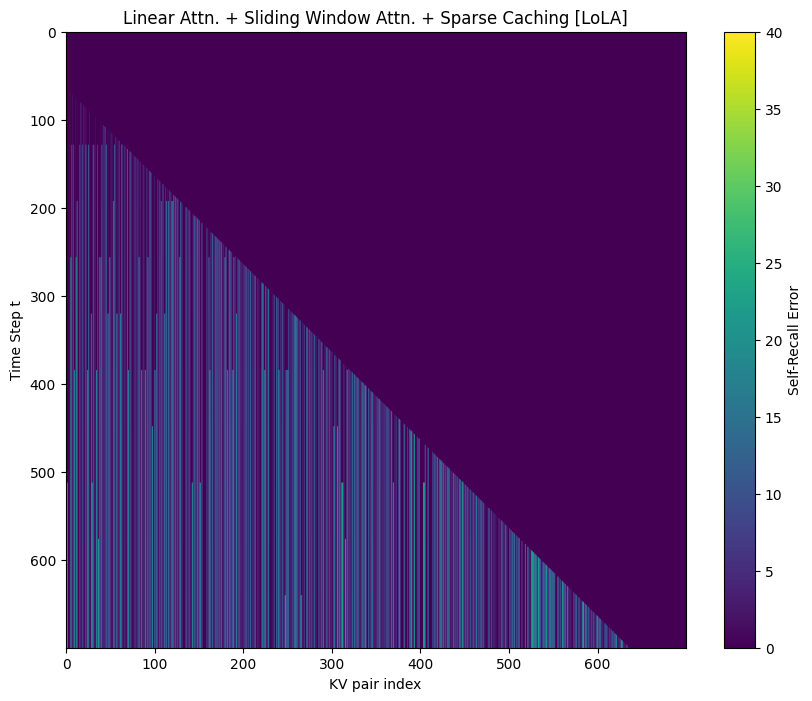

In [19]:

results = torch.load('/home/archy2/luke/LoLA/chunkwise_errors.pth').to(torch.float32)[:700, :700]
#results = torch.log(results)
#results = results - torch.diagonal(results).unsqueeze(0)
results = torch.tril(results,-64)
print(results.size())


plt.figure(figsize=(10, 8))
plt.imshow(results.cpu().numpy(), cmap='viridis', aspect='auto', vmin=0, vmax=40)
plt.colorbar(label='Self-Recall Error')
plt.title('Linear Attn. + Sliding Window Attn. + Sparse Caching [LoLA]')
plt.ylabel('Time Step t')
plt.xlabel('KV pair index')
plt.show()

torch.Size([700, 700])


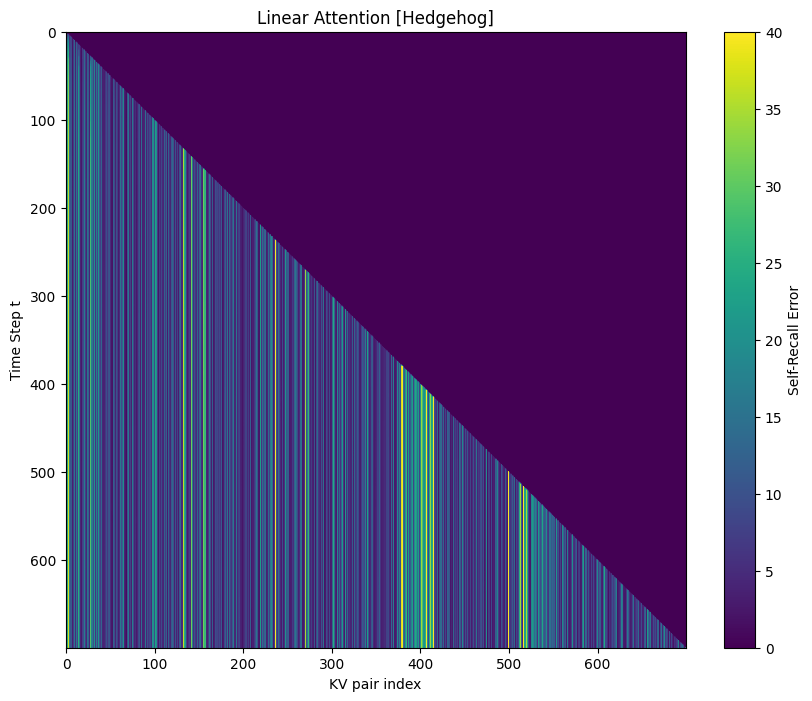

In [20]:
results = torch.load('/home/archy2/luke/LoLA/lin_attn_errors.pth').to(torch.float32)#[:,:100]
results = results[0,0]
#results = torch.log(results)
#results = results - torch.diagonal(results).unsqueeze(0)
results = torch.tril(results)
results = results[:700,:700]
print(results.size())


plt.figure(figsize=(10, 8))
plt.imshow(results.cpu().numpy(), cmap='viridis', aspect='auto', vmin=0, vmax=40)
plt.colorbar(label='Self-Recall Error')
plt.title('Linear Attention [Hedgehog]')
plt.ylabel('Time Step t')
plt.xlabel('KV pair index')
plt.show()

torch.Size([700, 700])


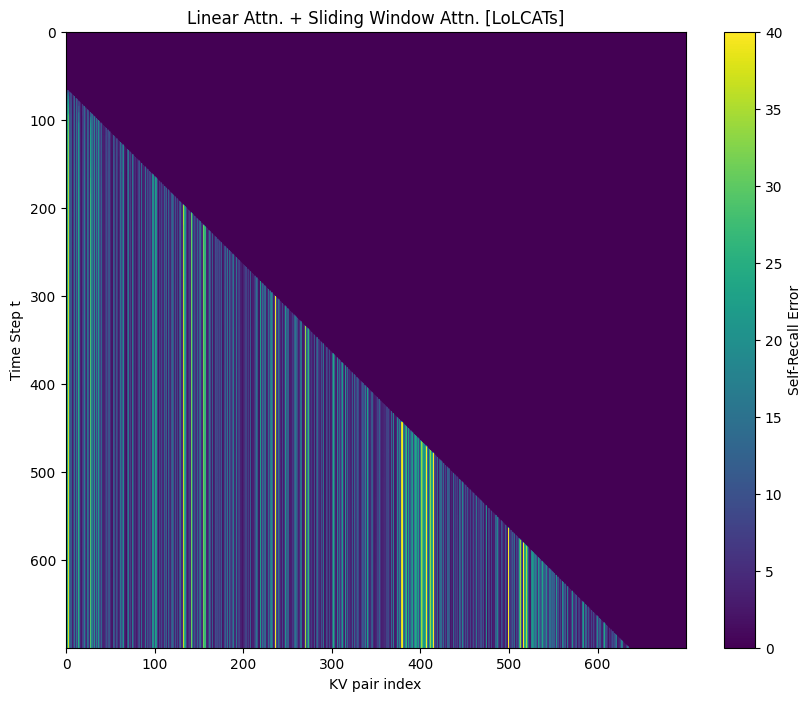

In [22]:
results = torch.load('/home/archy2/luke/LoLA/lin_attn_errors.pth').to(torch.float32)#[:,:100]
results = results[0,0]
#results = torch.log(results)
#results = results - torch.diagonal(results).unsqueeze(0
results = results.roll(64,0)
results = torch.tril(results, -64)
results = results[:700,:700]

print(results.size())


plt.figure(figsize=(10, 8))
plt.imshow(results.cpu().numpy(), cmap='viridis', aspect='auto', vmin=0, vmax=40)
plt.colorbar(label='Self-Recall Error')
plt.title('Linear Attn. + Sliding Window Attn. [LoLCATs]')
plt.ylabel('Time Step t')
plt.xlabel('KV pair index')
plt.show()

torch.Size([700, 700])


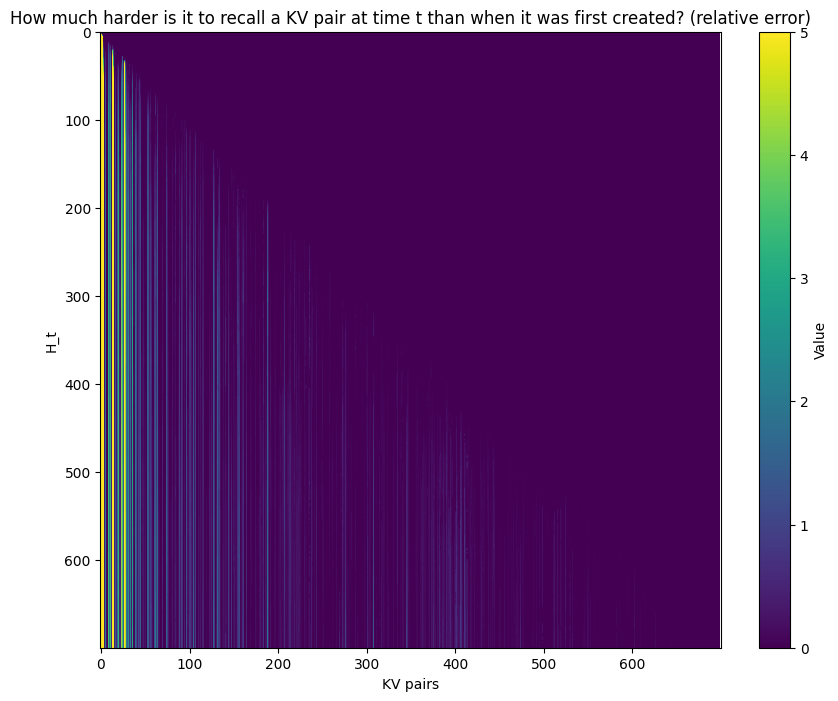

In [6]:
results = torch.load('/home/archy2/luke/LoLA/lin_attn_errors.pth').to(torch.float32)#[:,:100]
results = results[0,0]
#results = torch.log(results)
results = results - torch.diagonal(results).unsqueeze(0)
results = torch.tril(results)
results = results[:700,:700]
print(results.size())


plt.figure(figsize=(10, 8))
plt.imshow(results.cpu().numpy(), cmap='viridis', aspect='auto', vmin=0,vmax=5)
plt.colorbar(label='Value')
plt.title('How much harder is it to recall a KV pair at time t than when it was first created? (relative error)')
plt.ylabel('H_t')
plt.xlabel('KV pairs')
plt.show()

torch.Size([700, 700])


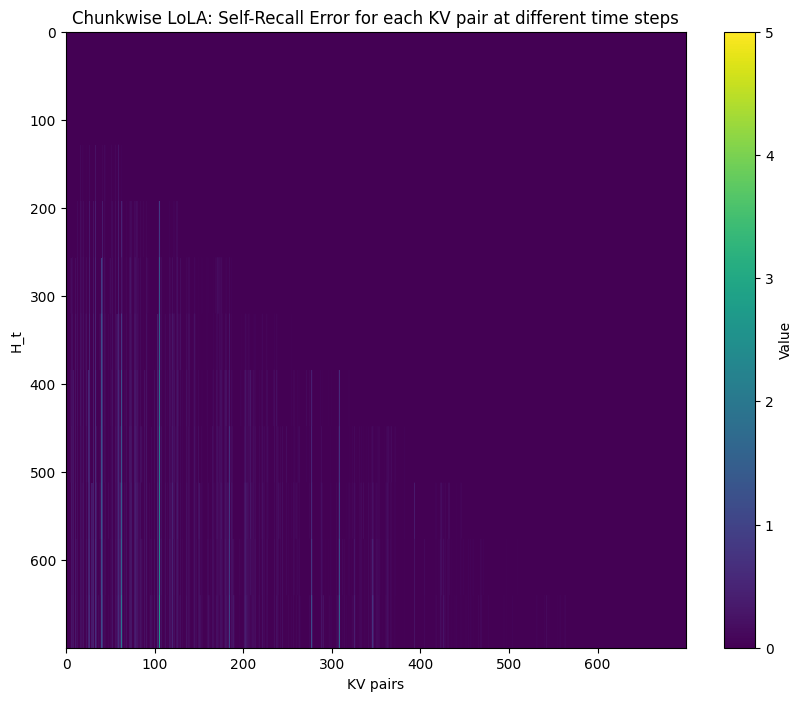

In [7]:
results = torch.load('/home/archy2/luke/LoLA/chunkwise_errors.pth').to(torch.float32)[:700,:700] #[:,:100]

results = torch.tril(results,-64)

first_non_zero_values = []
for col in range(results.size(1)):
    non_zero_indices = (results[:, col] > 0).nonzero(as_tuple=True)[0]
    if len(non_zero_indices) > 0:
        first_non_zero_values.append(results[non_zero_indices[0], col].item())
    else:
        first_non_zero_values.append(0)  # If no non-zero value, append 0
diagonal = torch.tensor(first_non_zero_values, device=results.device)

#results = torch.log(results)
results = results - diagonal.unsqueeze(0)
#results = results - torch.diagonal(results).unsqueeze(0)
results = torch.tril(results,-64)
print(results.size())


plt.figure(figsize=(10, 8))
plt.imshow(results.cpu().numpy(), cmap='viridis', aspect='auto', vmin=0, vmax=5)
plt.colorbar(label='Value')
plt.title('Chunkwise LoLA: Self-Recall Error for each KV pair at different time steps')
plt.ylabel('H_t')
plt.xlabel('KV pairs')
plt.show()

In [ ]:
# Get the first non-zero value in each column of the lower triangular tensor


In [2]:
f_k_f = torch.load('/home/archy2/luke/LoLA/checkpoints/f_k_f.pt')
print(f_k_f.size())

torch.Size([1, 32, 262, 128])


In [18]:
k = f_k_f[0,14]
k = k / torch.norm(k, p=2,dim=-1).unsqueeze(-1)
similarity = k @ k.T
print(similarity.mean())
#print(k[:10,:5])
print(similarity[:10,:10])

tensor(1.0000, device='cuda:0')
tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.00